In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import cufflinks as cf
import plotly
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
cf.go_offline() 

In [ ]:
# pip install cufflinks

In [ ]:
df = pd.read_csv('./Cancer.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.drop(['Patient Id'],axis = 1,inplace=True)

In [ ]:
df.head()

In [ ]:
df['Level']

In [ ]:
df['Level'].replace('Medium','High',inplace=True)

In [ ]:
df['Level'].replace('High','1',inplace=True)
df['Level'].replace('Low','0',inplace=True)


In [ ]:
df.head()

In [ ]:
df['Level'] = pd.to_numeric(df['Level'])

In [ ]:
df.isnull()

In [ ]:
df.isnull().any()

In [ ]:
df.isnull().sum()

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull())

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=df)

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='ChestPain',data = df)

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='ChestPain',y='Age',data = df)

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Smoking',y='Age',data = df)

In [ ]:

sorted_smokers = df.groupby('Age')['Smoking'].count().to_frame()
sorted_smokers

In [ ]:
# pip install --upgrade jinja2


In [ ]:
sorted_smokers.style.background_gradient(cmap = 'Reds')

In [ ]:
df.style.background_gradient(cmap = 'Reds')

In [ ]:
label = df.Age.sort_values().unique()       
target = sorted_smokers.Smoking


In [ ]:
print(label)
print(target)

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=label,y=target))
fig.update_layout(title = 'Smokers per age',xaxis=dict(title='Age'),yaxis=dict(title='Smokers'))
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=label,y=target,mode='markers+lines'))
fig.update_layout(title = 'Smokers per age',xaxis=dict(title='Age'),yaxis=dict(title='Smokers'))
fig.show()

# Machine Learning 
## RandomForest Classifier

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import log_loss, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np 
acc_dict = {}
# create the data
X = df.drop('Level',axis = 1)
y = df['Level']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

Accuracy score :  100.0


/tmp/ipykernel_10047/1595709450.py:16: RuntimeWarning:

divide by zero encountered in log



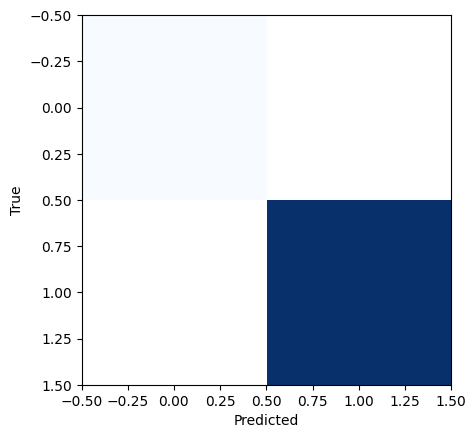

In [59]:
from sklearn.ensemble import  RandomForestClassifier
# create model
model = RandomForestClassifier()

# fit the data in the model
model.fit(X_train,y_train)

y_pred_randomF = model.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test, y_pred_randomF)*100)

acc_dict['RFC_log_loss'] = log_loss(y_test, y_pred_randomF)
# lower log_loss indicate better performance of model
acc_dict['RFC_F!1_Score'] = f1_score(y_test, y_pred_randomF,average='weighted')
# higher the F1 score value higher the performace...:
# The parameter average='weighted' indicates that the F1 score is calculated by taking the weighted average of the scores for each class, weighted by the number of true instances for each class.


# prediction visualization
plt.imshow(np.log(confusion_matrix(y_test,y_pred_randomF)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

## KNeighbourClassifier

Best k is 3 with score 0.9973333333333333
Accuracy score :  100.0


/tmp/ipykernel_10047/1047062874.py:24: RuntimeWarning:

divide by zero encountered in log



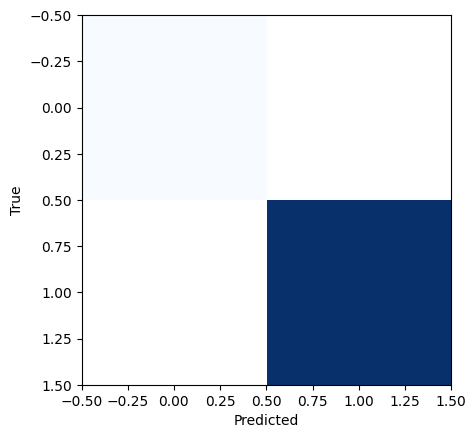

In [55]:
from sklearn.neighbors import KNeighborsClassifier
# to find the best k 
score = 0
scores, highscore, bestk = 0, 0, 0

for k in range(3,12):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train)
    score = scores.mean()
    if score>highscore:
        highscore = score
        bestk = k
print('Best k is {} with score {}'.format(bestk, highscore))

knn = KNeighborsClassifier(n_neighbors=bestk)
knn.fit(X_train,y_train)
# prediction 
y_predict = knn.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test,y_predict)*100)
acc_dict['KNN_log_loss'] = log_loss(y_test, y_predict)
# lower log_loss indicate better performance of model
acc_dict['KNN_F!1_Score'] = f1_score(y_test, y_predict,average='weighted')
# higher the F1 score value higher the performace...:
# The parameter average='weighted' indicates that the F1 score is calculated by taking the weighted average of the scores for each class, weighted by the number of true instances for each class.


# prediction visualization
plt.imshow(np.log(confusion_matrix(y_test,y_predict)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

## KMeans Clustering

Accuracy score :  1.2


/tmp/ipykernel_10047/2715091797.py:9: RuntimeWarning:

divide by zero encountered in log



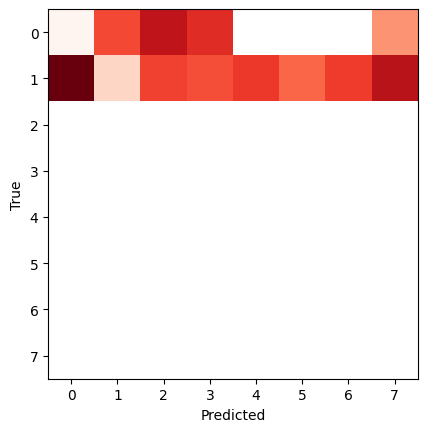

In [56]:
from sklearn.cluster import KMeans
clf = KMeans()
clf.fit(X_train)
maxx = clf.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test,maxx)*100)
acc_dict['kMeans_log_loss'] = log_loss(y_test, maxx)
acc_dict['kMeans_F1_Score'] = f1_score(y_test, maxx,average='weighted')

plt.imshow(np.log(confusion_matrix(y_test,maxx)),cmap='Reds', interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')

plt.show()

## Tree Classifier

Accuracy score :  100.0


/tmp/ipykernel_10047/1182936360.py:10: RuntimeWarning:

divide by zero encountered in log



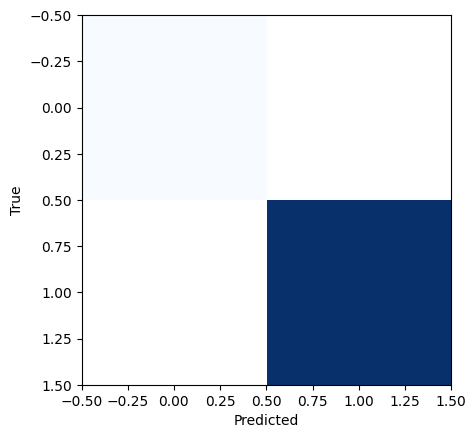

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree_ = DecisionTreeClassifier()
tree_.fit(X_train,y_train)
y_pred = tree_.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
acc_dict['Tree_log_loss'] = log_loss(y_test,y_pred)
acc_dict['Tree_f!1_score'] = f1_score(y_test,y_pred)

# prediction visualization
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

## SVM

Accuracy score :  98.0


/tmp/ipykernel_10047/4278561424.py:9: RuntimeWarning:

divide by zero encountered in log



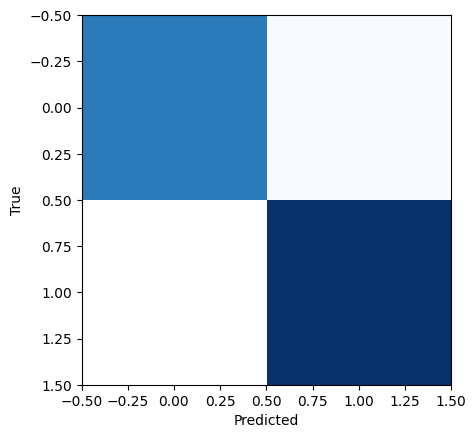

In [58]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy score : ',accuracy_score(y_test, y_pred)*100)
acc_dict['svc_log_loss'] = log_loss(y_test,y_pred)
acc_dict['svc_f!1_score'] = f1_score(y_test,y_pred)
# prediction visualization
plt.imshow(np.log(confusion_matrix(y_test,y_pred)),cmap = 'Blues',interpolation = 'nearest')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

# Accuracy Report

|   Algorithm                 | Log_Loss_score |     F1_score    | 
|-----------------------------|----------------|-----------------|
|    RFC                      |   9.9920072216 |       1.0       |
|    KNN                      |   9.9920072216 |       1.0       |
|    kMeans                   |   15.059149585 |       0.14      |
|    svm                      |   0.6907915198 |       0.98      |
|    DecisionTreeClassifier   |   9.9920072216 |       1.0       |
